# Load packages and data

In [1]:
import logging
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from DecisionTreeClassifier import (
    DecisionTreeClassifier as CustomDecisionTreeClassifier,
)
from RandomForestClassifier import (
    RandomForestClassifier as CustomRandomForestClassifier,
)
from rich import print
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier as SklearnRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier
from sklearn.tree import plot_tree as plot_sklearn_tree
from utils import print_evaluation_metrics

logging.basicConfig(level=logging.INFO)

%load_ext rich
%load_ext autoreload 

%autoreload 2

## Titanic dataset

In [2]:
data = pd.read_csv("../data/train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked", "Sex"]

data = data.dropna(subset=["Age", "Embarked"])
data = data.drop("PassengerId", axis=1)

X = data.drop("Survived", axis=1)[features]
y = data["Survived"]

X = pd.get_dummies(X, columns=["Embarked", "Sex"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
472,2,33.0,1,2,27.7500,False,False,True,True,False
432,2,42.0,1,0,26.0000,False,False,True,True,False
666,2,25.0,0,0,13.0000,False,False,True,False,True
30,1,40.0,0,0,27.7208,True,False,False,False,True
291,1,19.0,1,0,91.0792,True,False,False,True,False


## Generated dataset

In [6]:
X, y = make_classification(
    n_samples=1000,
    n_features=30,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 30), (200, 30), (800,), (200,))

In [7]:
hyperparameters = {
    "max_depth": 5,
    "min_samples_split": 15,
    "max_features": 7,
    "min_impurity_decrease": 0.001,
    "random_state": 42,
}

# Decision Tree


## Custom implementation

In [8]:
clf = CustomDecisionTreeClassifier(
    **hyperparameters,
    debug=True,
)

clf.fit(X_train, y_train)


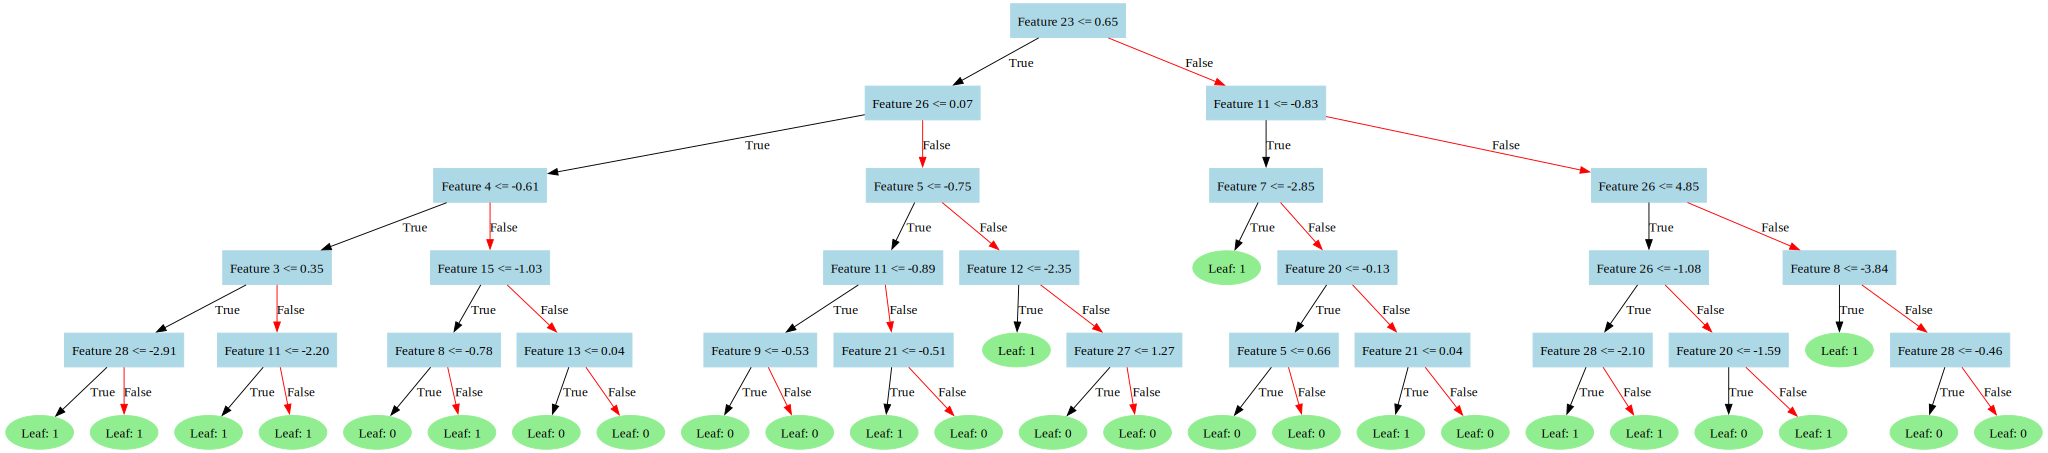

In [9]:
clf.visualize_tree()

In [10]:
preds = clf.predict(X_test)

Model: Custom Decision Tree Classifier
DecisionTreeClassifier(max_depth=5, min_samples_split=15, max_features=7)
Accuracy: 0.86
Precision: 0.86
Recall: 0.8601440576230492
F1: 0.8599859985998599
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        98
           1       0.87      0.85      0.86       102

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



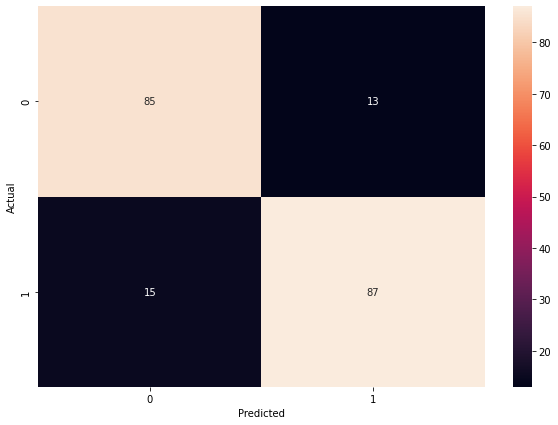


{
    'name': 'Custom Decision Tree Classifier',
    'model': DecisionTreeClassifier(max_depth=5, min_samples_split=15, max_features=7),
    'accuracy': 0.86,
    'precision': 0.86,
    'recall': 0.8601440576230492,
    'f1': 0.8599859985998599,
    'confusion_matrix': array([[85, 13],
       [15, 87]], dtype=int64)
}

In [11]:
print_evaluation_metrics(y_test, preds, clf, "Custom Decision Tree Classifier")

## Scikit-learn implementation

In [12]:
sklearn_clf = SklearnDecisionTreeClassifier(
    **hyperparameters,
    criterion="entropy",
)

sklearn_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_impurity_decrease=0.001, min_samples_split=15,
                       random_state=42)

In [13]:
sklearn_preds = sklearn_clf.predict(X_test)

Model: Sklearn Decision Tree Classifier
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_impurity_decrease=0.001, min_samples_split=15,
                       random_state=42)
Accuracy: 0.85
Precision: 0.8518667201926937
Recall: 0.8507402961184474
F1: 0.8499399759903962
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        98
           1       0.88      0.81      0.85       102

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



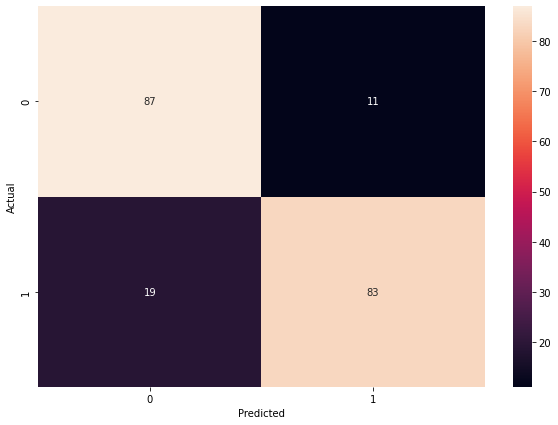


{
    'name': 'Sklearn Decision Tree Classifier',
    'model': DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_impurity_decrease=0.001, min_samples_split=15,
                       random_state=42),
    'accuracy': 0.85,
    'precision': 0.8518667201926937,
    'recall': 0.8507402961184474,
    'f1': 0.8499399759903962,
    'confusion_matrix': array([[87, 11],
       [19, 83]], dtype=int64)
}

In [14]:
print_evaluation_metrics(
    y_test, sklearn_preds, sklearn_clf, "Sklearn Decision Tree Classifier"
)


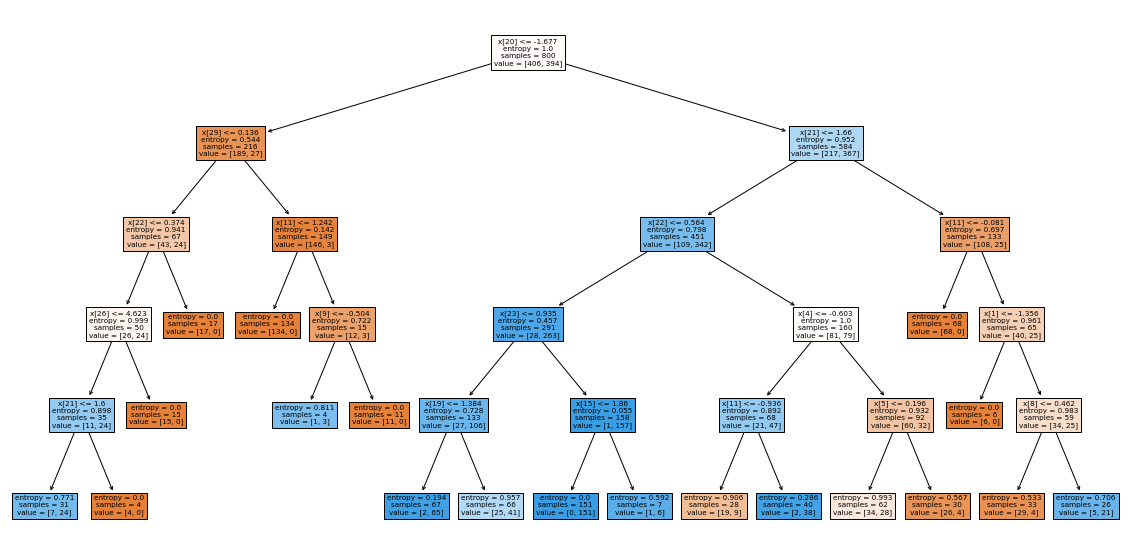

In [15]:
plt.figure(figsize=(20, 10))
sklearn_tree = plot_sklearn_tree(
    sklearn_clf,
    filled=True,
)

plt.show()

# Random Forest

## Custom implementation

In [16]:
rf_clf = CustomRandomForestClassifier(
    n_estimators=100,
    **hyperparameters,
    debug=True,
)

rf_clf.fit(X_train, y_train)
print(f"OOB Score: {rf_clf.oob_score_}")

DEBUG:RandomForestClassifier:Fitting 100 trees...
DEBUG:RandomForestClassifier:Fitting tree 1...
DEBUG:RandomForestClassifier:Tree 1 fitted...
DEBUG:RandomForestClassifier:Fitting tree 2...
DEBUG:RandomForestClassifier:Tree 2 fitted...
DEBUG:RandomForestClassifier:Fitting tree 3...
DEBUG:RandomForestClassifier:Tree 3 fitted...
DEBUG:RandomForestClassifier:Fitting tree 4...
DEBUG:RandomForestClassifier:Tree 4 fitted...
DEBUG:RandomForestClassifier:Fitting tree 5...
DEBUG:RandomForestClassifier:Tree 5 fitted...
DEBUG:RandomForestClassifier:Fitting tree 6...
DEBUG:RandomForestClassifier:Tree 6 fitted...
DEBUG:RandomForestClassifier:Fitting tree 7...
DEBUG:RandomForestClassifier:Tree 7 fitted...
DEBUG:RandomForestClassifier:Fitting tree 8...
DEBUG:RandomForestClassifier:Tree 8 fitted...
DEBUG:RandomForestClassifier:Fitting tree 9...
DEBUG:RandomForestClassifier:Tree 9 fitted...
DEBUG:RandomForestClassifier:Fitting tree 10...
DEBUG:RandomForestClassifier:Tree 10 fitted...
DEBUG:RandomForest

OOB Score: 0.93125

In [17]:
rf_preds = rf_clf.predict(X_test)

DEBUG:RandomForestClassifier:Making predictions using 100 trees...


Model: Custom Random Forest Classifier
RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=15, max_features=7)
OOB Score: 0.93125
Accuracy: 0.92
Precision: 0.92
Recall: 0.9201680672268908
F1: 0.9199919991999201
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        98
           1       0.93      0.91      0.92       102

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



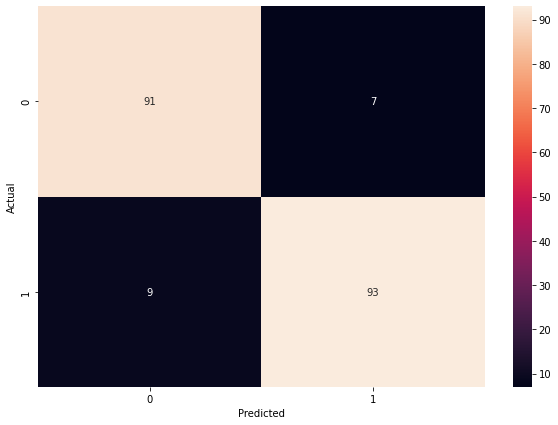


{
    'name': 'Custom Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=15, max_features=7),
    'accuracy': 0.92,
    'precision': 0.92,
    'recall': 0.9201680672268908,
    'f1': 0.9199919991999201,
    'confusion_matrix': array([[91,  7],
       [ 9, 93]], dtype=int64)
}

In [18]:
print_evaluation_metrics(y_test, rf_preds, rf_clf, "Custom Random Forest Classifier")

Visualizing tree 93...

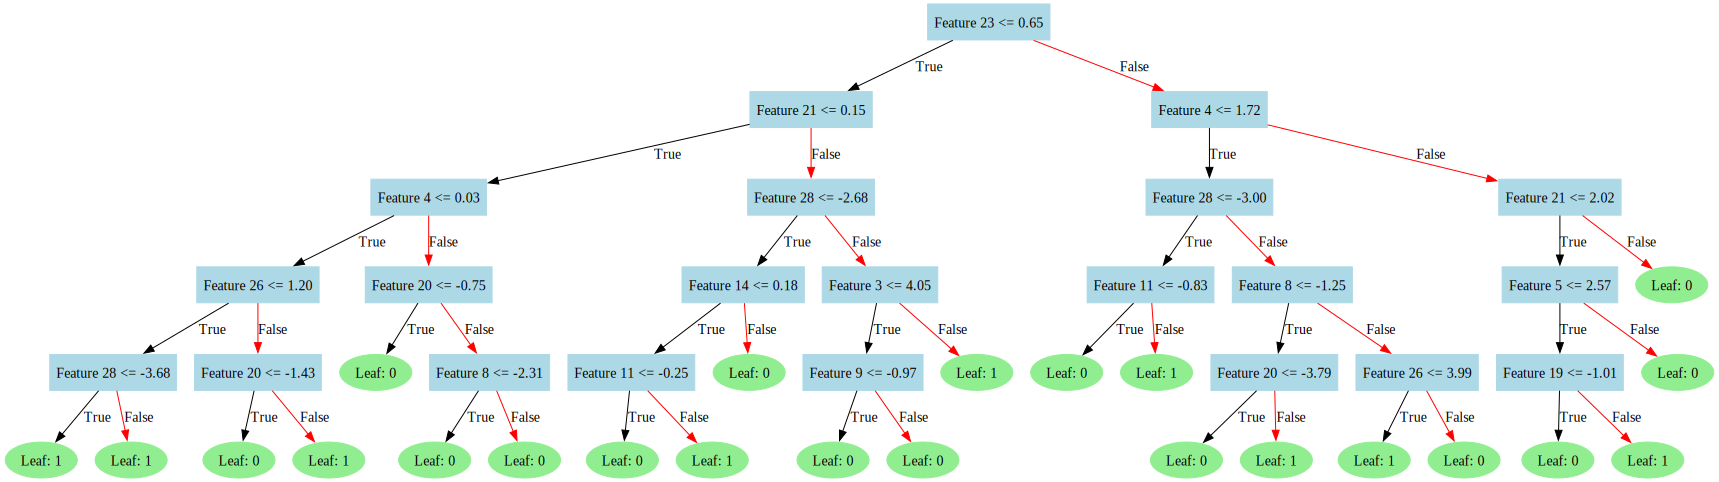

In [19]:
tree_idx = np.random.randint(0, rf_clf.n_estimators)

print(f"Visualizing tree {tree_idx}...")
rf_clf.trees[tree_idx].visualize_tree()


## Scikit-learn implementation

In [24]:
sklearn_rf_clf = SklearnRandomForestClassifier(
    n_estimators=100,
    **hyperparameters,
    oob_score=True,
    criterion="entropy",
    n_jobs=-1,
    verbose=1,
)

sklearn_rf_clf.fit(X_train, y_train)
print(f"OOB Score: {sklearn_rf_clf.oob_score_}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


OOB Score: 0.94875

In [25]:
sklearn_rf_preds = sklearn_rf_clf.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Model: Scikit-Learn Random Forest Classifier
RandomForestClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_impurity_decrease=0.001, min_samples_split=15,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)
OOB Score: 0.94875
Accuracy: 0.945
Precision: 0.9477265853412642
Recall: 0.9442777110844338
F1: 0.9448331201885705
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



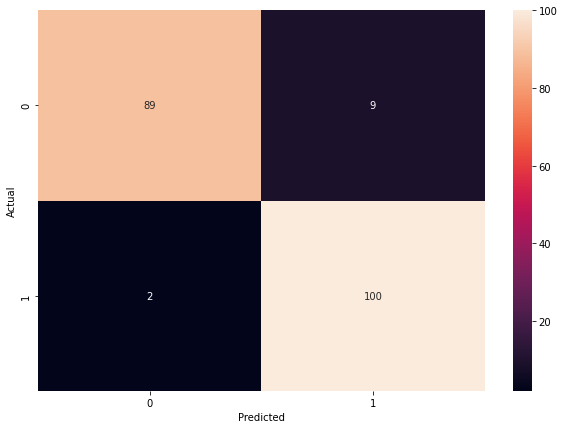


{
    'name': 'Scikit-Learn Random Forest Classifier',
    'model': RandomForestClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_impurity_decrease=0.001, min_samples_split=15,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1),
    'accuracy': 0.945,
    'precision': 0.9477265853412642,
    'recall': 0.9442777110844338,
    'f1': 0.9448331201885705,
    'confusion_matrix': array([[ 89,   9],
       [  2, 100]], dtype=int64)
}

In [26]:
print_evaluation_metrics(
    y_test, sklearn_rf_preds, sklearn_rf_clf, "Scikit-Learn Random Forest Classifier"
)

Visualizing tree 93...

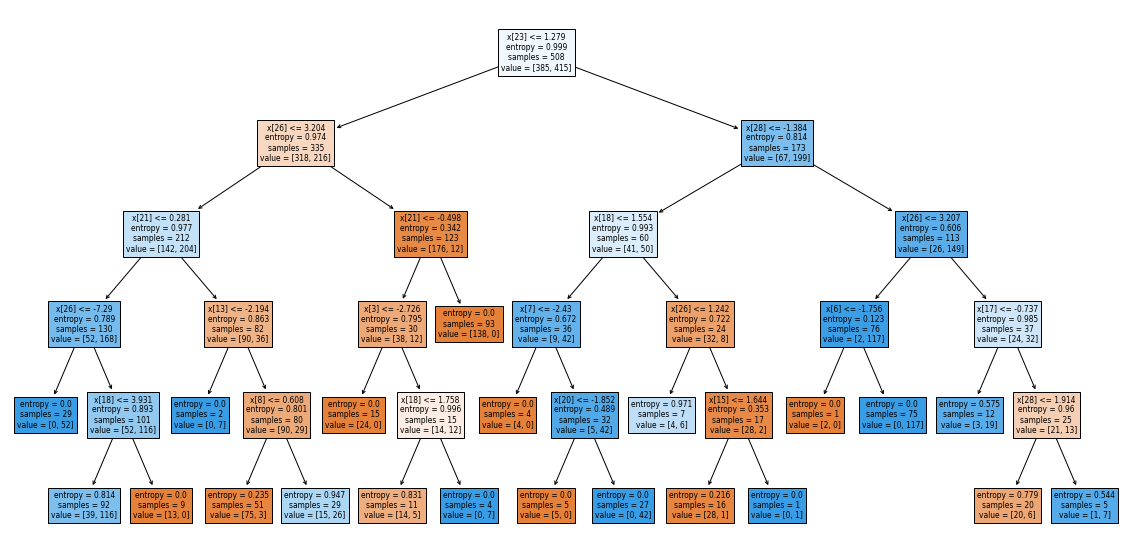

In [27]:
plt.figure(figsize=(20, 10))
print(f"Visualizing tree {tree_idx}...")
sklearn_rf_tree = plot_sklearn_tree(
    sklearn_rf_clf.estimators_[tree_idx],
    filled=True,
)

plt.show()